## QUESTION 
The file **mystery.dat** contains pairs $(x,y)$ , where $y\in\mathbb{R}$ and $x\in\mathbb{R}^{100}$. There is one data point per line, with comma-separated values; the very last number in each line is the $y$-value.

In this data set, $y$ is a linear function of just ten of the features in $x$ , plus some noise. Your job is to identify those ten features.

Which of the following contain only relevant features?

(Think of the feature numbers as being in the range 1 to 100, but be aware that Python indexes arrays 

In [148]:
import numpy as np
from sklearn import linear_model

In [149]:
data=np.loadtxt('mystery.dat',delimiter=',')
trainx = data[:,0:100]
trainy = data[:,-1]

In [150]:
def Lasso_regression(x,y,a):
    regr = linear_model.Lasso(alpha=a)
    regr.fit(x, y)
    return regr

In [217]:
for alpha in np.logspace(-1.6,-0.28,100):
    clf = Lasso_regression(trainx,trainy,alpha)
    s_L1 = clf.coef_
    nonzero_num=len(s_L1[np.abs(s_L1)>0])
    print(np.sort(np.flip(np.argsort(np.abs(s_L1)))[0:10]+1),nonzero_num,alpha)

[ 2  3  5  7 11 13 17 19 23 29] 62 0.025118864315095794
[ 2  3  5  7 11 13 17 19 23 29] 63 0.02590200204531324
[ 2  3  5  7 11 13 17 19 23 29] 63 0.02670955587558984
[ 2  3  5  7 11 13 17 19 23 29] 63 0.02754228703338166
[ 2  3  5  7 11 13 17 19 23 29] 63 0.02840098047914214
[ 2  3  5  7 11 13 17 19 23 29] 60 0.02928644564625236
[ 2  3  5  7 11 13 17 19 23 29] 57 0.03019951720402016
[ 2  3  5  7 11 13 17 19 23 29] 55 0.031141055844467583
[ 2  3  5  7 11 13 17 19 23 29] 55 0.03211194909364822
[ 2  3  5  7 11 13 17 19 23 29] 54 0.03311311214825911
[ 2  3  5  7 11 13 17 19 23 29] 54 0.034145488738336005
[ 2  3  5  7 11 13 17 19 23 29] 53 0.03521005201684519
[ 2  3  5  7 11 13 17 19 23 29] 53 0.03630780547701012
[ 2  3  5  7 11 13 17 19 23 29] 53 0.037439783898238106
[ 2  3  5  7 11 13 17 19 23 29] 52 0.03860705432153813
[ 2  3  5  7 11 13 17 19 23 29] 52 0.03981071705534971
[ 2  3  5  7 11 13 17 19 23 29] 51 0.04105190671273078
[ 2  3  5  7 11 13 17 19 23 29] 52 0.04233179328088207
[ 2  3

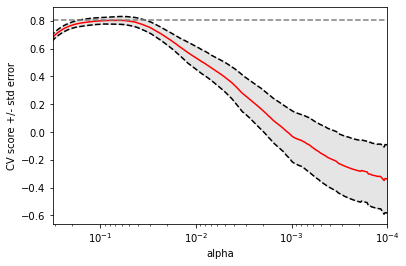

In [219]:
from sklearn import model_selection
import matplotlib.pyplot as plt
lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 300)
tuned_parameters = [{'alpha': alphas}] 
clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(trainx, trainy)
XL1 = linear_model.Lasso(alpha=clf.best_params_['alpha'])
XL1.fit(trainx, trainy)
s_L1 = XL1.coef_
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)
plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])
plt.show()


In [224]:
idx_best_alpha=np.argmax(scores)
best_alpah=alphas[idx_best_alpha]
clf = Lasso_regression(trainx,trainy,best_alpah)
s_L1 = clf.coef_
nonzero_num=len(s_L1[np.abs(s_L1)>0])
print(np.sort(np.flip(np.argsort(np.abs(s_L1)))[0:10]+1),nonzero_num,best_alpah)

[ 2  3  5  7 11 13 17 19 23 29] 45 0.06275652144031313


In [228]:
s_L1[s_L1>0.2]

array([0.86852124, 0.68200265, 1.06085405, 0.95854395, 0.90424589,
       0.70857333, 0.85983096, 0.79105633, 0.88347248, 0.56707905])